# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print("City not found. Skipping...")

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | alo
Processing Record 5 of Set 1 | walla walla
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | greenville
Processing Record 8 of Set 1 | kingscliff
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | toungo
Processing Record 11 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | holualoa
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | acarau
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | vibo

KeyboardInterrupt: 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          85
Lat           85
Lng           85
Max Temp      85
Humidity      85
Cloudiness    85
Wind Speed    85
Country       85
Date          85
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,75.51,81,67,8.12,PN,1745425306
1,edinburgh of the seven seas,-37.0676,-12.3116,65.07,87,8,16.98,SH,1745425307
2,hilo,19.7297,-155.0900,70.50,85,40,3.00,US,1745425250
3,alo,6.5486,4.2686,85.06,72,97,6.80,NG,1745425309
4,walla walla,46.0646,-118.3430,52.86,59,0,8.05,US,1745425310


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,75.51,81,67,8.12,PN,1745425306
1,edinburgh of the seven seas,-37.0676,-12.3116,65.07,87,8,16.98,SH,1745425307
2,hilo,19.7297,-155.0900,70.50,85,40,3.00,US,1745425250
3,alo,6.5486,4.2686,85.06,72,97,6.80,NG,1745425309
4,walla walla,46.0646,-118.3430,52.86,59,0,8.05,US,1745425310


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

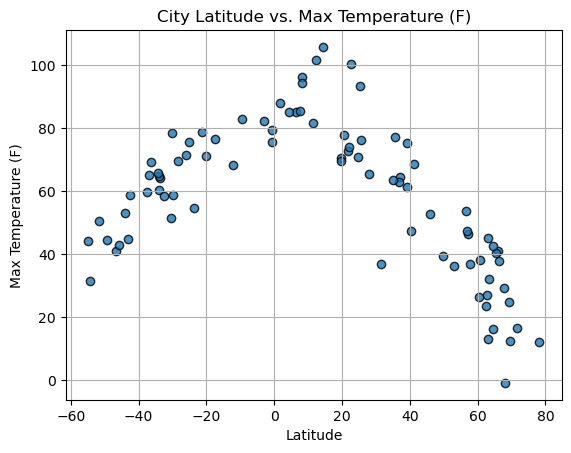

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

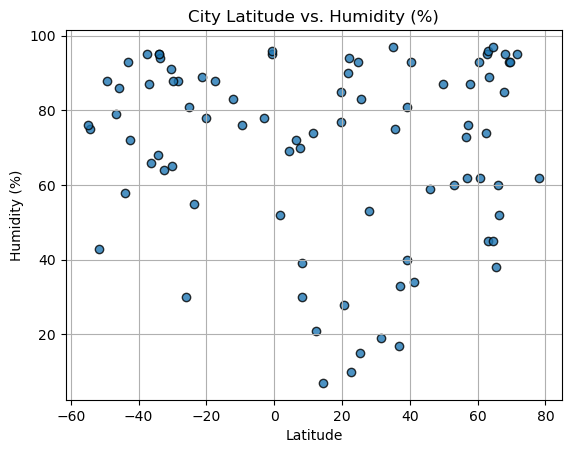

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

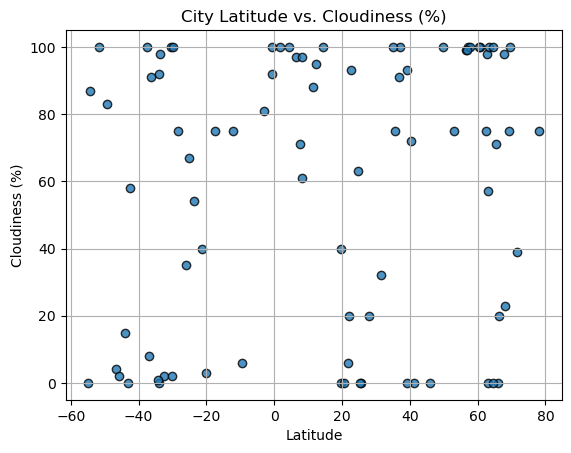

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

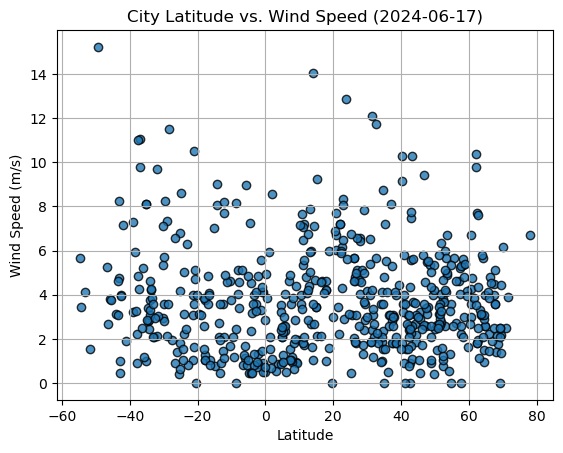

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min() + 1, y_values.min() + 5), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(f"output_data/{filename}")
    plt.show()

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hilo,19.7297,-155.0900,70.50,85,40,3.00,US,1745425250
3,alo,6.5486,4.2686,85.06,72,97,6.80,NG,1745425309
4,walla walla,46.0646,-118.3430,52.86,59,0,8.05,US,1745425310
6,greenville,35.6127,-77.3663,77.13,75,75,4.61,US,1745425312
8,enewetak,11.3474,162.3373,81.63,74,88,17.25,MH,1745425315


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,75.51,81,67,8.12,PN,1745425306
1,edinburgh of the seven seas,-37.0676,-12.3116,65.07,87,8,16.98,SH,1745425307
5,lebu,-37.6167,-73.6500,59.65,95,100,4.68,CL,1745425311
7,kingscliff,-28.2667,153.5667,69.60,88,75,12.66,AU,1745425314
12,puerto natales,-51.7236,-72.4875,50.45,43,100,14.97,CL,1745425320


###  Temperature vs. Latitude Linear Regression Plot

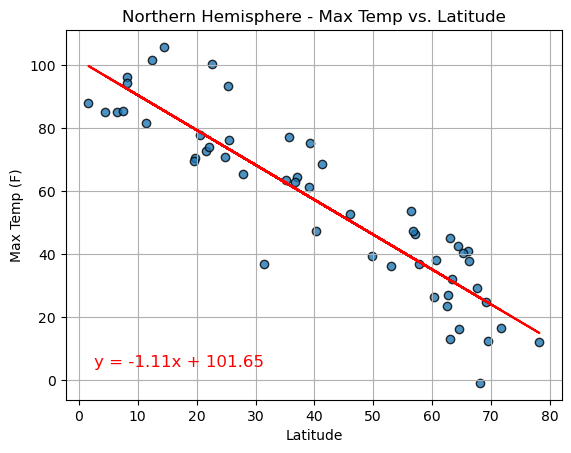

In [21]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
    "Northern Hemisphere - Max Temp vs. Latitude",
    "Latitude", "Max Temp (F)", "Fig5.png"
)


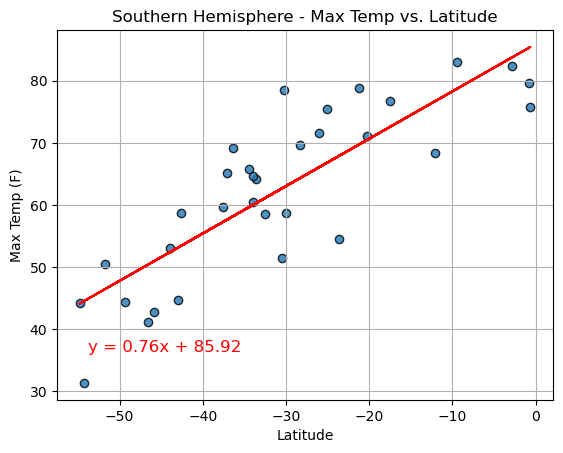

In [22]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
    "Southern Hemisphere - Max Temp vs. Latitude",
    "Latitude", "Max Temp (F)", "Fig6.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

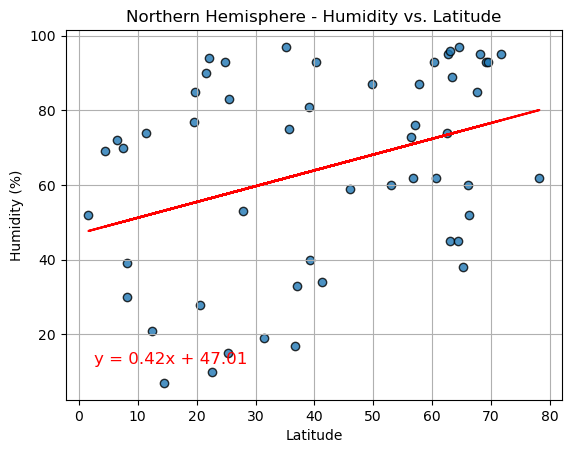

In [23]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
    "Northern Hemisphere - Humidity vs. Latitude",
    "Latitude", "Humidity (%)", "Fig7.png"
)

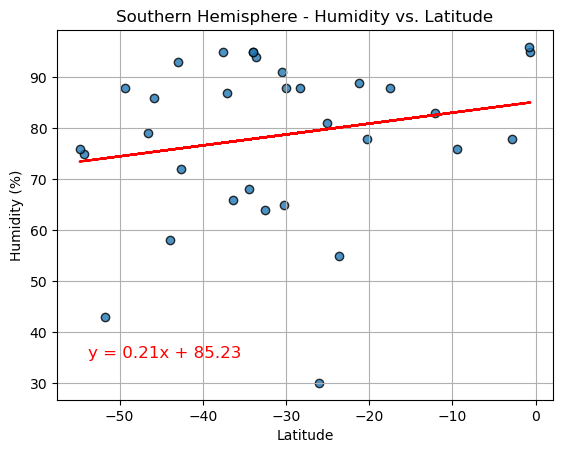

In [24]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
    "Southern Hemisphere - Humidity vs. Latitude",
    "Latitude", "Humidity (%)", "Fig8.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

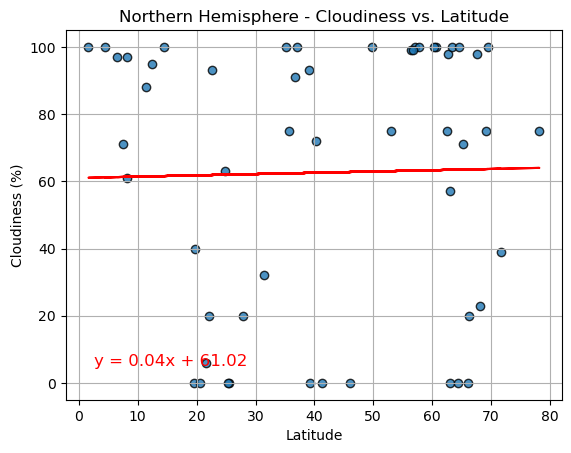

In [25]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
    "Northern Hemisphere - Cloudiness vs. Latitude",
    "Latitude", "Cloudiness (%)", "Fig9.png"
)

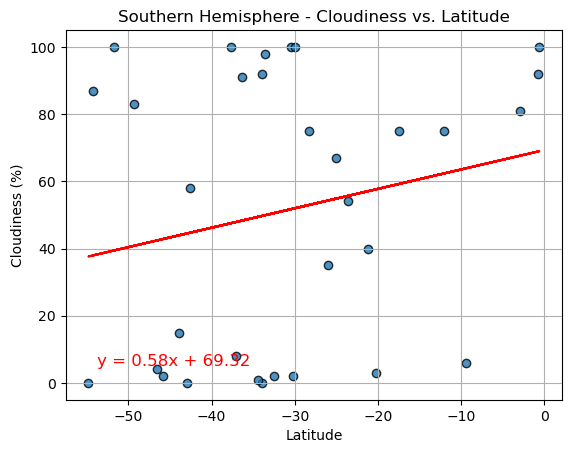

In [26]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
    "Southern Hemisphere - Cloudiness vs. Latitude",
    "Latitude", "Cloudiness (%)", "Fig10.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

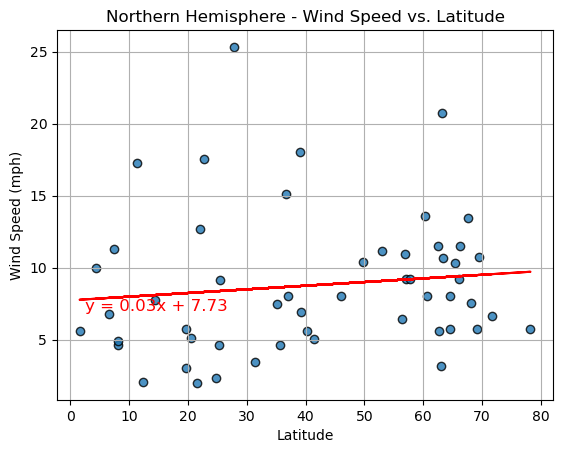

In [28]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
    "Northern Hemisphere - Wind Speed vs. Latitude",
    "Latitude", "Wind Speed (mph)", "Fig11.png"
)


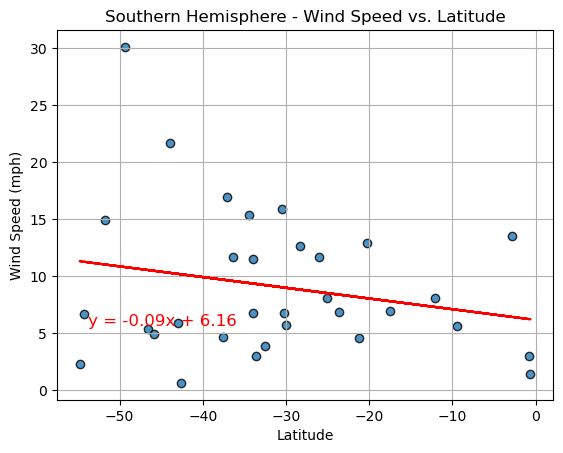

In [27]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
    "Southern Hemisphere - Wind Speed vs. Latitude",
    "Latitude", "Wind Speed (mph)", "Fig12.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The data shows a clear trend between latitude and temperature, with cities closer to the equator experiencing higher maximum temperatures, especially in the Northern Hemisphere where the correlation is strongest. 
# In contrast, variables like humidity, cloudiness, and wind speed didn’t show consistent patterns in relation to latitude.
# These factors appear to be more influenced by regional conditions rather than just geographic position. 
# Overall, while latitude is a strong indicator of temperature, it doesn't reliably predict other aspects of the weather, which are likely shaped by local environments and weather systems.
